In [1]:
%matplotlib inline
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [2]:
def single(image_path, template_path, resize_values):
    template = cv2.imread(template_path)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    template = cv2.Canny(template, 50, 200)
    w, h = template.shape[::-1]

    methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED']

    img = cv2.imread(image_path)
    found = None

    for resize_value in resize_values:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resize = imutils.resize(img_gray, width = int(img_gray.shape[1] * resize_value))
        r = img_gray.shape[1] / float(img_resize.shape[1])

        if img_resize.shape[0] < h or img_resize.shape[1] < w:
            break

        img_resize = cv2.Canny(img_resize, 50, 200)

        for meth in methods:
            method = eval(meth)
            res = cv2.matchTemplate(img_resize, template, method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

            if found is None or max_val > found[0]:
                found = (max_val, max_loc, r, res)

    (max_val, max_loc, r, res) = found
    (start_x, start_y) = (int(max_loc[0] * r), int(max_loc[1] * r))
    (end_x, end_y) = (int((max_loc[0] + w) * r), int((max_loc[1] + h) * r))

    cv2.rectangle(img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 2)

    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title(str(max_val))
    plt.subplot(122)
    plt.imshow(img, cmap='gray')
    plt.title('Detected Point')
    plt.show()


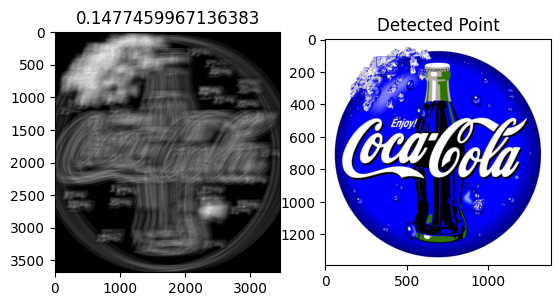

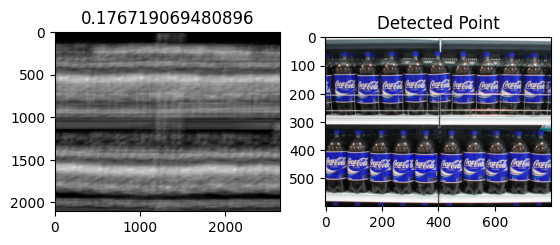

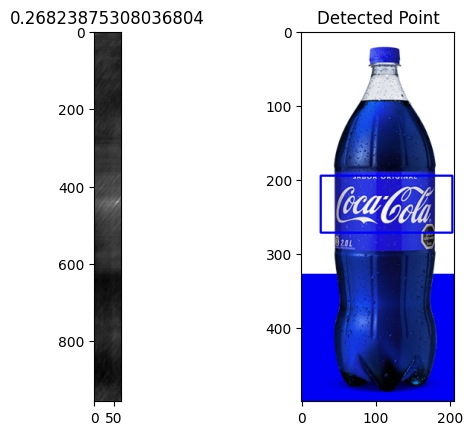

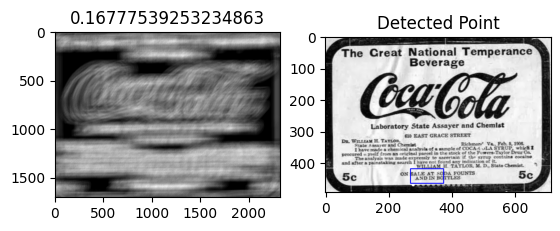

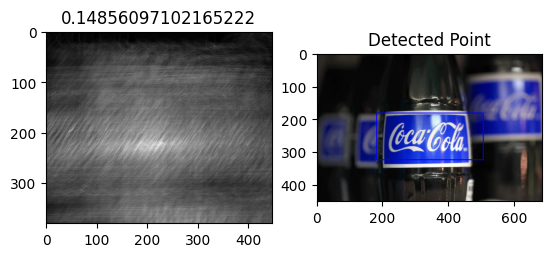

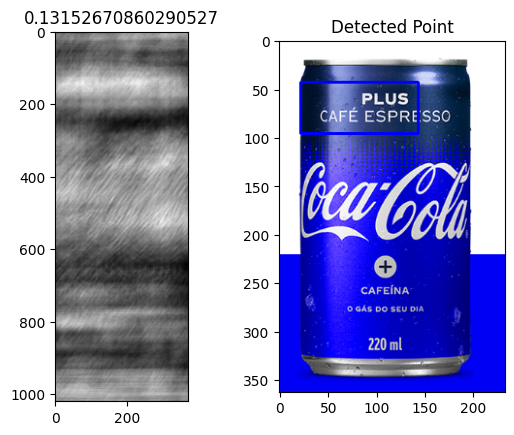

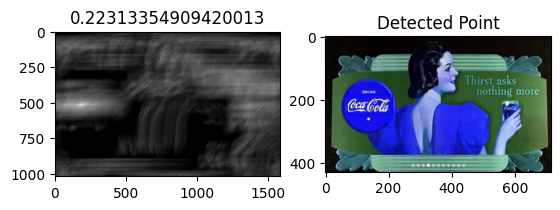

In [3]:
import os
resize_values = np.linspace(0.2, 10, 20)[::-1]
for file in os.listdir('images'):
    image_path = 'images/' + file
    single(image_path, 'template/pattern.png', resize_values)

In [15]:
def multiple(image_path, template_path, resize_values, threshold):
    template = cv2.imread(template_path)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    template = cv2.Canny(template, 50, 200)
    w, h = template.shape[::-1]

    methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED']

    img = cv2.imread(image_path)
    found = None

    for resize_value in resize_values:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resize = imutils.resize(img_gray, width = int(img_gray.shape[1] * resize_value))
        r = img_gray.shape[1] / float(img_resize.shape[1])

        if img_resize.shape[0] < h or img_resize.shape[1] < w:
            break

        img_resize = cv2.Canny(img_resize, 50, 200)

        for meth in methods:
            method = eval(meth)
            res = cv2.matchTemplate(img_resize, template, method)
            _, max_val, _, _ = cv2.minMaxLoc(res)
            if found is None or max_val > found[0]:
                found = (max_val, r, res)

    if found[0] > threshold:
        (max_val, r, res) = found
        loc = np.where(res >= threshold)
        for pt in zip(*loc[::-1]):
            (start_x, start_y) = (int(pt[0] * r), int(pt[1] * r))
            (end_x, end_y) = (int((pt[0] + w) * r), int((pt[1] + h) * r))

            cv2.rectangle(img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 2)

        plt.subplot(121)
        plt.imshow(res, cmap='gray')
        plt.title(str(max_val))
        plt.subplot(122)
        plt.imshow(img, cmap='gray')
        plt.title('Detected Point')
        plt.show()
    else:
        print(found[0])


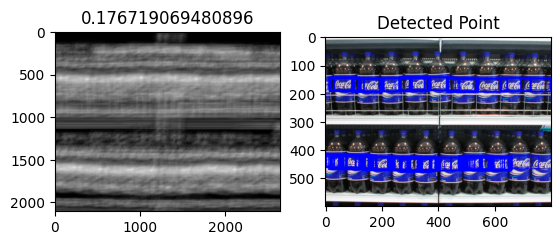

In [9]:
resize_values = np.linspace(0.2, 10, 20)[::-1]
multiple('images/coca_multi.png', 'template/pattern.png', resize_values, 0.15)

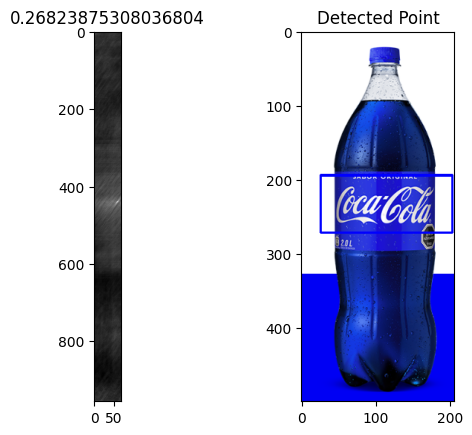

In [17]:
import os
resize_values = np.linspace(0.2, 10, 20)[::-1]
for file in os.listdir('images'):
    image_path = 'images/' + file
    multiple(image_path, 'template/pattern.png', resize_values, 0.25)